**calculate the swbgt and and to datset**

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import time
import numpy as np
import Calculation.humiditycalculation as humidcalc
import Calculation.trend_func as trends
import Calculation.save_detrend_deseason as sdd
import Plot.plotfunctions as plotfunc
homefolder = '/home/nniebaum/data_nils'
datafolder = '/data/user/nniebaum'
populationfolder = datafolder + '/gpw-v4/'
plotfolder = '/home/nniebaum/bachlor-thesis-code/Plots/'
areafolder = plotfolder + "Area/"

output_dtype = float
timestart = "1900-01-01"
timeend = "2010-12-31"
location = "europe_full"
# rolling_window = 4*365

**Create mask from 98th percentile of cdo max 31 ydrunpctl**

**correct sWBGT data**

In [2]:
# data= xr.open_dataset(datafolder + '/europe_1900-01-01_2010-12-31.nc')
data = xr.open_dataset(datafolder + '/europe_daymax_1900-01-01_2010-12-31.nc')
data_false = xr.open_dataset(datafolder + '/europe_full_daymax_masks_population_1900-01-01_2010-12-31.nc')


In [3]:

st = time.time()
swbgt = humidcalc.swbgt_func(data.t2m, data.d2m)
print(time.time() -st)

1.9100418090820312


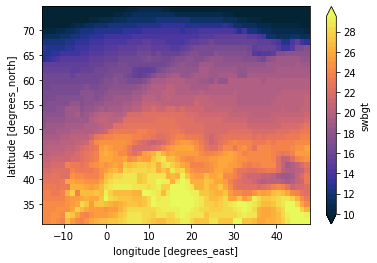

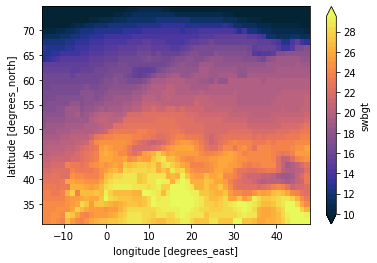

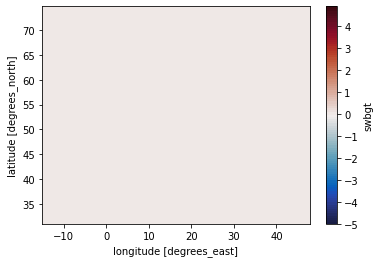

In [4]:
plt.figure()
(data_false.swbgt.sel(time= slice("2003-06", "2003-08")).mean('time')).plot(cmap = "cmo.thermal", levels = np.arange(10,30,0.5))
plt.figure() 
(data.swbgt.sel(time= slice("2003-06", "2003-08")).mean('time')).plot(cmap = "cmo.thermal", levels = np.arange(10,30,0.5))
plt.figure() 
(data_false.swbgt -data.swbgt).sel(time= slice("2003-06", "2003-08")).mean('time').plot(cmap = "cmo.balance", levels = np.arange(-5,5,0.1))

**load false swbgt data and it will be replaced here**

(array([       0.,        0.,        0.,        0.,        0., 88543728.,
               0.,        0.,        0.,        0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5],
       dtype=float32),
 <BarContainer object of 10 artists>)

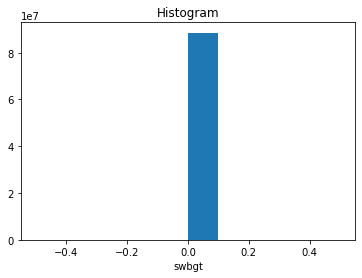

In [10]:
attrs = data.swbgt.attrs
data_false['swbgt'] = data.swbgt
data_false.swbgt.attrs = attrs
data_false.to_netcdf(datafolder + '/correct_swbgt_europe_daymax_masks_population_1900-01-01_2010-12-31.nc')


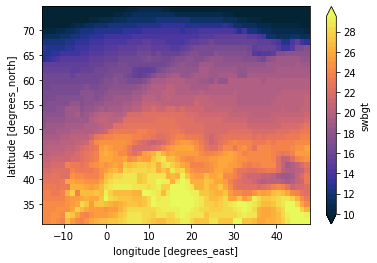

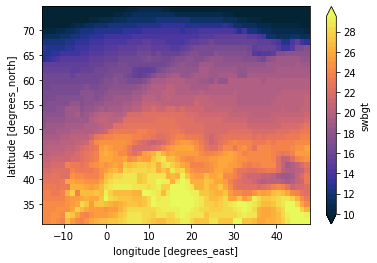

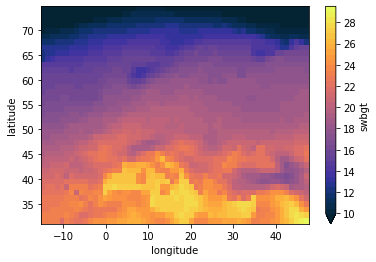

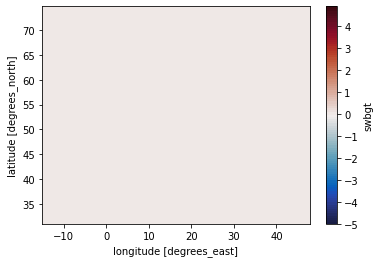

In [13]:
plt.figure()
(data_false.swbgt.sel(time= slice("2003-06", "2003-08")).mean('time')).plot(cmap = "cmo.thermal", levels = np.arange(10,30,0.5))
plt.figure() 
(data.swbgt.sel(time= slice("2003-06", "2003-08")).mean('time')).plot(cmap = "cmo.thermal", levels = np.arange(10,30,0.5))
plt.figure()
(data_new.swbgt.sel(time= slice("2003-06", "2003-08")).mean('time')).plot(cmap = "cmo.thermal", levels = np.arange(10,30,0.5))
plt.figure() 
(data_false.swbgt -data.swbgt).sel(time= slice("2003-06", "2003-08")).mean('time').plot(cmap = "cmo.balance", levels = np.arange(-5,5,0.1))

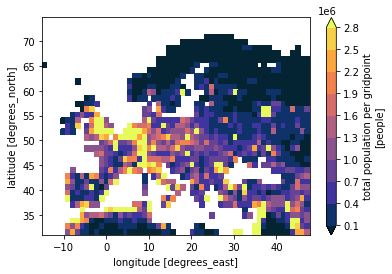

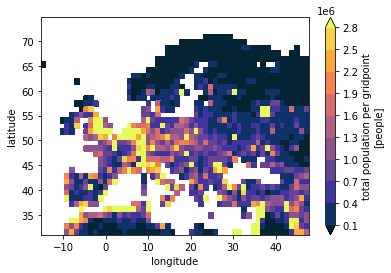

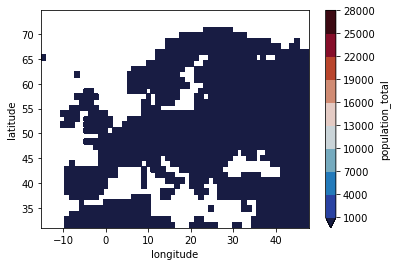

In [18]:
# plt.figure()
# data_false.population_total.plot(cmap = "cmo.thermal", levels = np.arange(0.1,3,0.3)*1e6)
plt.figure() 
data_false.population_total.plot(cmap = "cmo.thermal", levels = np.arange(0.1,3,0.3)*1e6)
plt.figure()
data_new.population_total.plot(cmap = "cmo.thermal", levels = np.arange(0.1,3,0.3)*1e6)
plt.figure() 
(data_new.population_total -data_false.population_total).plot(cmap = "cmo.balance", levels = np.arange(0.1,3,0.3)*1e4)

In [4]:
t_c = 30
t_dew = 25
RH = 0.7463
RH_2 = humidcalc.rh_func(t_c,t_dew)
print(RH_2)
print(humidcalc.swbgt_func(t_c, t_dew))
print(0.56*t_c + 0.393 * RH_2 * humidcalc.e_func(t_c) + 3.94)
e = RH * 6.105*np.exp(17.27 * t_c /(237.7 + t_c))
0.567*t_c + 0.393 * e + 3.94

0.7462820502423823
33.165622620288
33.165622620288


33.352651071536805